# Chapter 3 
 Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Advanced Methods of Statistical Process Control

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import mistat
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Tests of Randomness

### Testing the Number of Runs

### Runs Above and Below a Specified Level

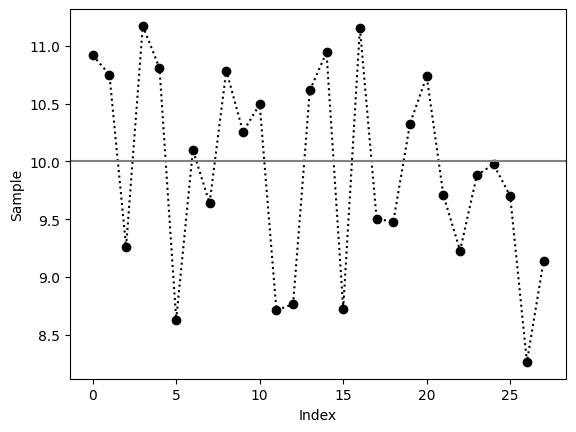

In [3]:
rnorm10 = mistat.load_data('RNORM10')
ax = rnorm10.plot(marker='o', linestyle=':', color='black')
ax.axhline(10, color='grey')
ax.set_ylabel('Sample')
ax.set_xlabel('Index')
plt.show()

In [4]:
rnorm10 = mistat.load_data('RNORM10')

x = [0 if xi <= 10 else 1 for xi in rnorm10]
_ = mistat.runsTest(x, alternative='less', verbose=True)


Runs Test

Standard Normal = -0.3596, p-value = 0.3596
alternative hypothesis: less


### Runs Up and Down

### Testing the Length of Runs Up and Down

## Modified Shewhart Control Charts for $\bar X$

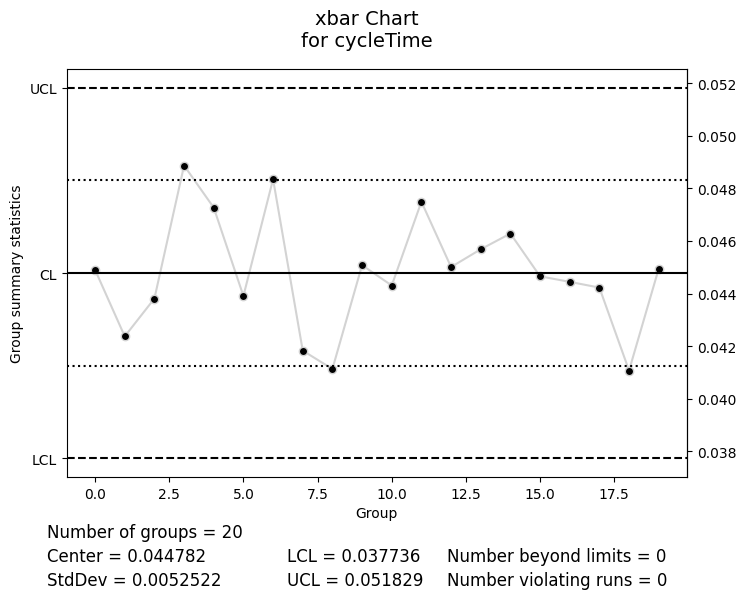

In [5]:
Ps = mistat.PistonSimulator(n_simulation=5 * 20, seed=1).simulate()
Ps = mistat.simulationGroup(Ps, 5)

cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])
qcc = mistat.QualityControlChart(cycleTime)

fig, ax = plt.subplots(figsize=(8, 6))
qcc.plot(title='for cycleTime', ax=ax)
st = qcc.std_dev / np.sqrt(qcc.sizes[0])
ax.axhline(qcc.center + 1.5 * st, linestyle=':', color='black')
ax.axhline(qcc.center - 1.5 * st, linestyle=':', color='black')
plt.show()

## The Size and Frequency of Sampling for Shewhart Control Charts

### The Economic Design for $\bar X$-charts

### Increasing The Sensitivity of $p$-charts

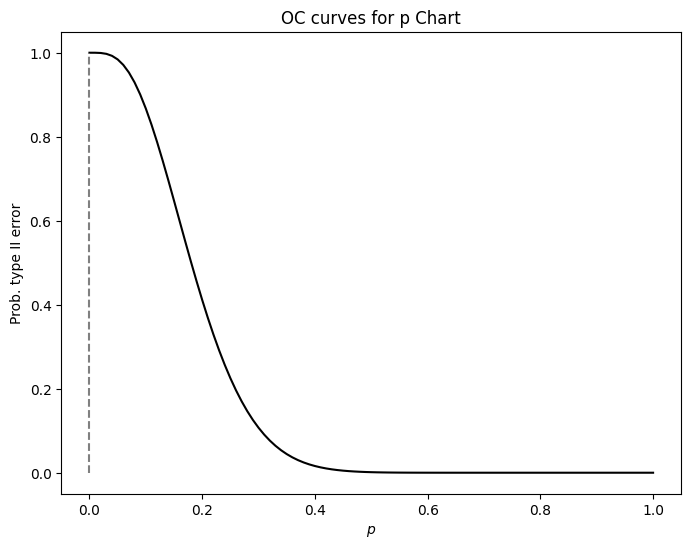

In [6]:
jandefect = mistat.load_data('JANDEFECT')
qcc = mistat.QualityControlChart(jandefect, qcc_type='p', sizes=20,
                                 center=0.048, std_dev=np.sqrt(0.048 * (1 - 0.048)))
qcc.oc_curves()

## Cumulative Sum Control Charts

### Upper Page's Scheme

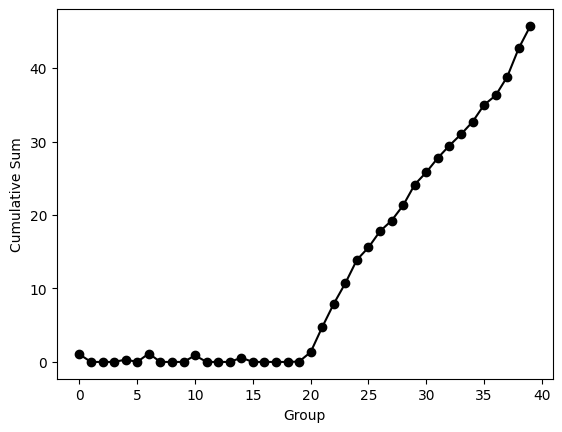

In [7]:
np.random.seed(1)
x = [*stats.norm(10).rvs(20), *stats.norm(13).rvs(20)]

analysis = mistat.Cusum(x, center=10)
ax = pd.Series(analysis.pos).plot(marker='o', color='black')
ax.set_xlabel('Group')
ax.set_ylabel('Cumulative Sum')
plt.show()

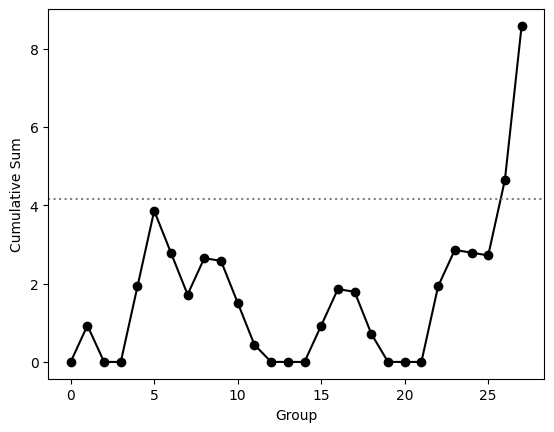

In [8]:
ipl = mistat.load_data('IPL')

analysis = mistat.Cusum(ipl, center=1.07, std_dev=1, se_shift=0, sizes=1, decision_interval=4.16)
ax = pd.Series(analysis.pos).plot(marker='o', color='black')
ax.set_xlabel('Group')
ax.set_ylabel('Cumulative Sum')
ax.axhline(analysis.decision_interval, color='gray', linestyle=':')
plt.show()

### Some Theoretical Background

#### A. Normal Distribution

#### B. Binomial Distributions

#### C. Poisson Distributions

### Lower and Two-Sided Page's Scheme

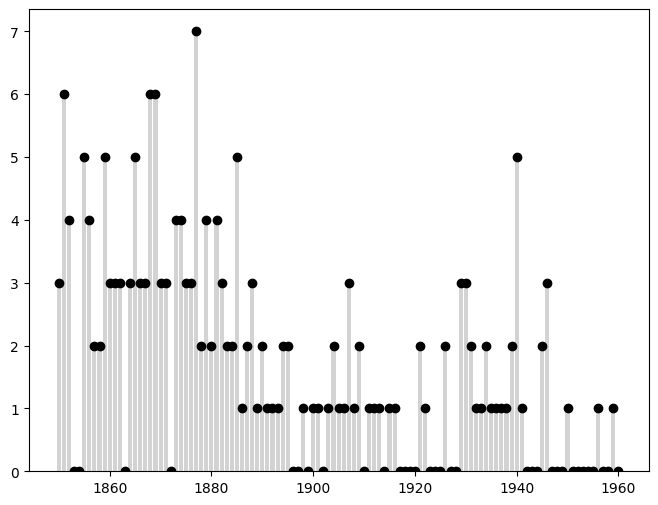

In [9]:
coal = mistat.load_data('COAL')
coal.index = range(1850, 1961)

_, ax = plt.subplots(figsize=(8, 6))
# use zorder to plot the dots over the bars
ax.scatter(coal.index, coal, color='black', zorder=2)
ax.bar(coal.index, coal, color='lightgrey', zorder=1)
plt.show()

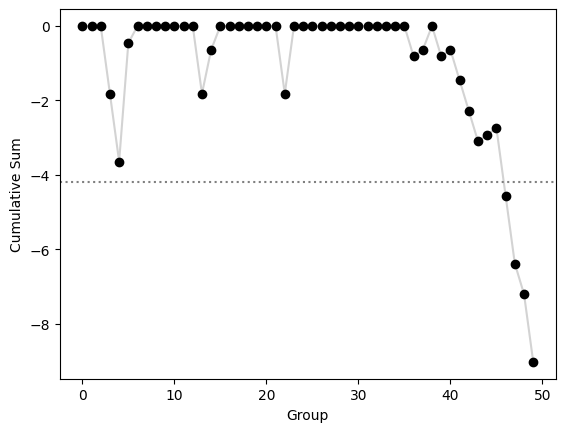

In [10]:
analysis = mistat.Cusum(coal.iloc[:50], center=1.82, std_dev=1, se_shift=0, decision_interval=4.19)
ax = pd.Series(analysis.neg).plot(color='lightgrey', marker='o',
      markerfacecolor='black', markeredgecolor='black')
ax.set_xlabel('Group')
ax.set_ylabel('Cumulative Sum')
ax.axhline(-analysis.decision_interval, color='grey', linestyle=':')
plt.show()

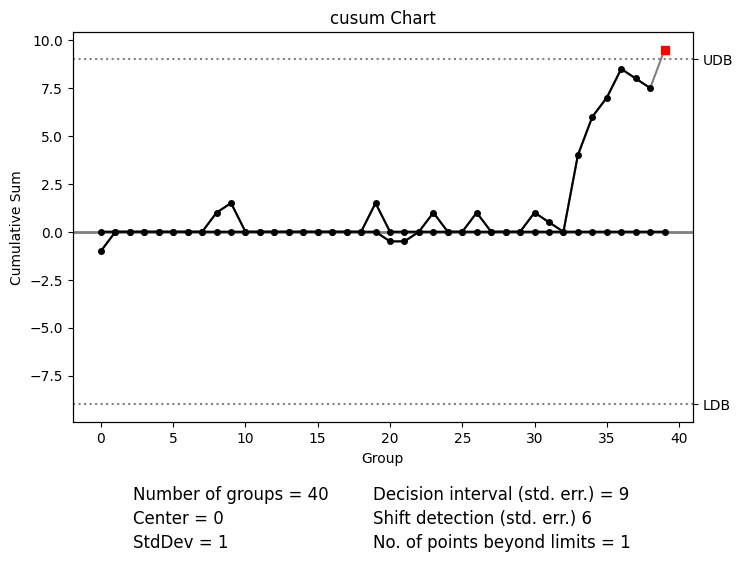

In [11]:
thickdiff = mistat.load_data('THICKDIFF')

analysis = mistat.Cusum(thickdiff, center=0, std_dev=1, se_shift=6,
                        decision_interval=9)
analysis.plot()
plt.show()

### Average Run Length, Probability of False Alarm And Conditional Expected Delay

In [12]:
results = []
for loc in (0, 0.5, 1.0, 1.5):
    arl = mistat.cusumArl(randFunc=stats.norm(loc=loc), N=100,
                          limit=10_000, seed=100, verbose=False)
    results.append({
        'theta': loc,
        'ARL': arl['statistic']['ARL'],
        '2 S.E.': 2 * arl['statistic']['Std. Error'],
    })
print(pd.DataFrame(results))

   theta     ARL      2 S.E.
0    0.0  978.71  294.600536
1    0.5  126.66   36.962435
2    1.0   16.54    4.265489
3    1.5    5.86    1.386506


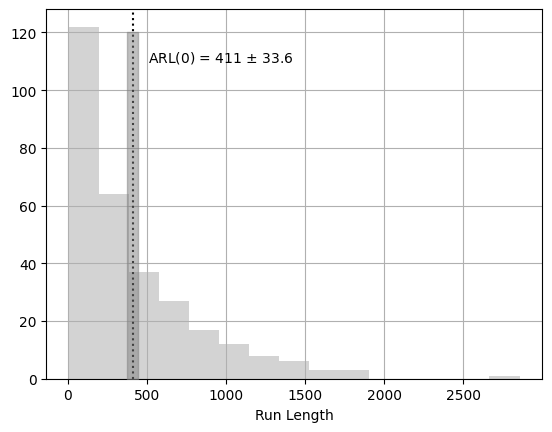

In [13]:
arl = mistat.cusumArl(randFunc=stats.norm(loc=10, scale=5), N=300, limit=7000, seed=1,
                     kp=12, km=8, hp=29, hm=-29, verbose=False)
rls = [r.rl for r in arl['run']]
ax = pd.Series(rls).hist(bins=15, color='lightgrey', zorder=1)
ax.set_xlabel('Run Length')
arlstats = arl['statistic']
ax.axvline(arlstats['ARL'], linestyle=':', zorder=3, color='black')
ax.fill_between([arlstats['ARL'] - arlstats['Std. Error'], arlstats['ARL'] + arlstats['Std. Error']],
        120, color='grey', zorder=10, alpha=0.5)
ax.text(510, 110, f"ARL(0) = {arlstats['ARL']:.0f} $\pm$ {arlstats['Std. Error']:.1f}")
plt.show()

In [14]:
for h in (18.7, 28, 28.5, 28.6, 28.7, 29, 30):
  arl = mistat.cusumArl(randFunc=stats.norm(loc=10, scale=5),
          N=300, limit=7000, seed=1, kp=12, km=8, hp=h, hm=-h,
          verbose=False)
  print(f"h {h:5.1f}: ARL(0) {arl['statistic']['ARL']:5.1f} ",
        f"+/- {arl['statistic']['Std. Error']:4.1f}")

h  18.7: ARL(0)  70.7  +/-  5.5
h  28.0: ARL(0) 363.2  +/- 30.0
h  28.5: ARL(0) 387.7  +/- 31.5
h  28.6: ARL(0) 394.7  +/- 32.4
h  28.7: ARL(0) 397.3  +/- 32.5
h  29.0: ARL(0) 411.4  +/- 33.6
h  30.0: ARL(0) 484.0  +/- 42.0


In [15]:
results = []
for p in (0.05, 0.06, 0.07):
    arl = mistat.cusumArl(randFunc=stats.binom(n=100, p=p), N=100, limit=2000,
                          seed=1, kp=5.95, km=3.92, hp=12.87, hm=-8.66)
    results.append({
        'p': p,
        'delta': p/0.05,
        'ARL': arl['statistic']['ARL'],
        '2 S.E.': 2 * arl['statistic']['Std. Error'],
    })
print(pd.DataFrame(results))

      p  delta     ARL     2 S.E.
0  0.05    1.0  291.71  78.261710
1  0.06    1.2   41.00  10.528704
2  0.07    1.4   11.78   2.636513


In [16]:
arl = mistat.cusumArl(randFunc=stats.poisson(mu=10), N=100, limit=2000, seed=1,
                     kp=12.33, km=8.41, hp=11.36, hm=-12.91)
arl['statistic']

{'ARL': 289.6363636363636, 'Std. Error': 43.223677106723144}

In [17]:
results = []
for loc in (0.5, 1.0, 1.5):
    pfaced = mistat.cusumPfaCed(randFunc1=stats.norm(),
                                randFunc2=stats.norm(loc=loc),
                                tau=100, N=100, limit=1_000, seed=1,
                                verbose=False)
    results.append({
        'theta': loc,
        'PFA': pfaced['statistic']['PFA'],
        'CED': pfaced['statistic']['CED'],
        'S.E.': pfaced['statistic']['Std. Error'],
    })

In [18]:
print(pd.DataFrame(results))

   theta   PFA         CED       S.E.
0    0.5  0.08  109.206522  21.695590
1    1.0  0.08   15.663043  12.022705
2    1.5  0.08    4.869565  10.927976


## Bayesian Detection

In [19]:
common = {'mean0': 10, 'sd': 3, 'n': 5, 'tau': 10, 'w': 99, 'seed': 1,
          'verbose': False}
pd.DataFrame([
    mistat.shroArlPfaCedNorm(delta=0.5, **common)['statistic'],
    mistat.shroArlPfaCedNorm(delta=1.0, **common)['statistic'],
    mistat.shroArlPfaCedNorm(delta=1.5, **common)['statistic'],
    mistat.shroArlPfaCedNorm(delta=2.0, **common)['statistic'],
], index=[0.5, 1.0, 1.5, 2.0])

,ARL,Std. Error,PFA,CED,CED-Std. Error
0.5,17.17,0.250621,0.00,7.170000,1.580130
1.0,12.45,0.106184,0.01,2.505051,1.234753
1.5,11.55,0.080467,0.01,1.606061,1.156715
2.0,11.04,0.059867,0.01,1.090909,1.109741


In [20]:
common = {'mean0': 10, 'sd': 3, 'n': 5, 'delta': 2.0, 'seed': 1,
          'verbose': False}
pd.DataFrame([
    mistat.shroArlPfaCedNorm(w=19, **common)['statistic'],
    mistat.shroArlPfaCedNorm(w=50, **common)['statistic'],
    mistat.shroArlPfaCedNorm(w=99, **common)['statistic'],
], index=[19, 50, 99])

,ARL,Std. Error
19,48.81,4.411115
50,106.32,10.868872
99,186.49,18.288885


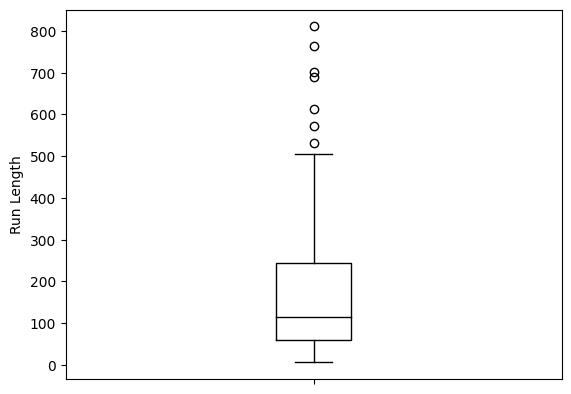

In [21]:
result = mistat.shroArlPfaCedNorm(mean0=10, sd=3, n=5, delta=2.0, w=99, seed=1, verbose=False)

ax = pd.Series(result['rls']).plot.box(color='black')
ax.set_ylabel('Run Length')
plt.show()

## Process Tracking

### The EWMA Procedure

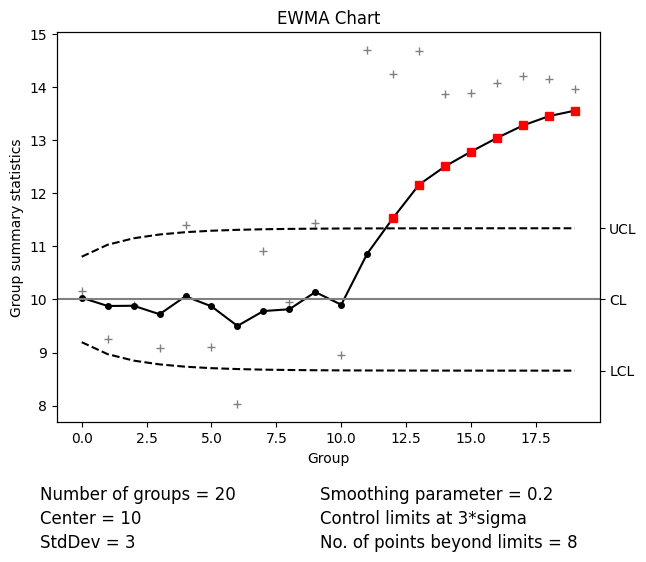

In [22]:
np.random.seed(1)

x = [*stats.norm(loc=10, scale=3).rvs(11*5), *stats.norm(loc=14).rvs(9*5)]

groups = [y for xi in range(1, 21) for y in [xi]*5]
grouped = mistat.qcc_groups(x, groups=groups)

ewma = mistat.EWMA(grouped, center=10, std_dev=3, smooth=0.2, nsigmas=3)
ewma.plot()
plt.show()

### The BECM Procedure

### The Kalman Filter

In [23]:
dojo1935 = mistat.load_data('DOJO1935')

# solve the regression equation
m = 20
sqrt_t = np.sqrt(range(1, m + 1))
df = pd.DataFrame({
    'Ut': dojo1935[:m]/sqrt_t,
    'x1t': 1 / sqrt_t,
    'x2t': sqrt_t,
})
model = smf.ols(formula='Ut ~ x1t + x2t - 1', data=df).fit()
mu0, delta = model.params
var_eta = np.var(model.resid, ddof=2)
pd.Series({'mu0': mu0, 'delta': delta, 'Var(eta)': var_eta})

mu0         127.484294
delta         0.655591
Var(eta)      0.073094
dtype: float64

In [24]:
# choose sig2e and w20
sig2e = 0.0597
w20 = 0.0015

# apply the filter
results = []
mu_tm1 = mu0
w2_tm1 = w20
y_tm1 = mu0
for i in range(0, len(dojo1935)):
    y_t = dojo1935[i]
    B_t = sig2e / (var_eta + w2_tm1)
    mu_t = B_t * (mu_tm1 + delta) + (1 - B_t) * y_t
    results.append({
        't': i + 1, # adjust for Python indexing starting at 0
        'y_t': y_t,
        'mu_t': mu_t,
    })
    w2_tm1 = B_t * (var_eta - sig2e + w2_tm1)
    mu_tm1 = mu_t
    y_tm1 = y_t
results = pd.DataFrame(results)

In [25]:
results

,t,y_t,mu_t
0,1,128.06,128.123935
1,2,129.05,128.860064
2,3,129.76,129.599472
3,4,130.35,130.289430
4,5,130.77,130.880329
...,...,...,...
295,296,169.14,170.004860
296,297,166.36,169.049545
297,298,168.07,169.092630
298,299,168.79,169.389281


In [26]:
def renderResults(results):
  style = results.iloc[:25,].style.hide(axis='index')
  style = style.format(precision=2)
  s = style.to_latex(hrules=True)
  s = s.replace('y_t', '$y_t$').replace('mu_t', '$\\mu_t$')
  print(s)

### The QMP tracking method

In [27]:
soldef = mistat.load_data('SOLDEF')

print('Batches above quality standard: ', sum(soldef > 100))
print('Batches above UCL: ', sum(soldef > 130))

xbar = np.cumsum(soldef) / np.arange(1, len(soldef)+1)
results = []
for i in range(2, len(soldef)):
    xbar_tm1 = np.mean(xbar[i-1])
    S2_tm1 = np.var(soldef[:i])
    gamma_tm1 = S2_tm1/xbar_tm1 - 1
    nu_tm1 = xbar_tm1 / gamma_tm1
    result = {
        't': i + 1,
        'Xt': soldef[i],
        'xbar_tm1': xbar_tm1,
        'S2_tm1': S2_tm1,
        'Gamma_tm1': gamma_tm1,
        'nu_tm1': nu_tm1,
    }
    f = gamma_tm1 / (gamma_tm1 + 1)
    shape = nu_tm1 + soldef[i]
    result['lambda_t'] = f * shape
    result.update(((f'lambda({p})', f * stats.gamma.ppf(p, a=shape, scale=1))
                   for p in (0.01, 0.05, 0.95, 0.99)))
    results.append(result)
results = pd.DataFrame(results)

Batches above quality standard:  78
Batches above UCL:  56


In [28]:
results.iloc[7:18,:6]

,t,Xt,xbar_tm1,S2_tm1,Gamma_tm1,nu_tm1
7,10,29,23.666667,75.555556,2.192488,10.794433
8,11,16,24.200000,70.560000,1.915702,12.632442
9,12,31,23.454545,69.702479,1.971811,11.894925
10,13,19,24.083333,68.243056,1.833622,13.134298
11,14,18,23.692308,64.828402,1.736264,13.645570
12,15,20,23.285714,62.346939,1.677476,13.881400
13,16,103,23.066667,58.862222,1.551830,14.864167
14,17,31,28.062500,429.558594,14.307210,1.961424
15,18,33,28.235294,404.768166,13.335539,2.117297
16,19,12,28.500000,383.472222,12.455166,2.288207


In [29]:
columns = ['t', 'lambda_t', 'lambda(0.01)', 'lambda(0.05)', 'lambda(0.95)', 'lambda(0.99)']
results[columns].iloc[7:18,:]

,t,lambda_t,lambda(0.01),lambda(0.05),lambda(0.95),lambda(0.99)
7,10,27.329412,18.269554,20.614625,34.823998,38.404511
8,11,18.812358,11.608966,13.426364,24.943983,27.941960
9,12,28.460991,19.335560,21.709736,35.965710,39.533742
10,13,20.793935,13.220777,15.149897,27.172485,30.264858
11,14,20.080321,12.718035,14.591126,26.289756,29.303464
12,15,21.227169,13.673109,15.605406,27.560145,30.618912
13,16,71.676080,57.216594,61.173113,82.870183,87.922817
14,17,30.808097,19.711615,22.543950,40.133227,44.645935
15,18,32.667630,21.223593,24.158968,42.232357,46.840514
16,19,13.226295,6.462529,8.042895,19.458119,22.694785


## Automatic Process Control

In [30]:
c_A = 100
c_d = 1000
b = 1
q_tp1 = c_d
data = []
for t in range(14, 0, -1):
    q_t = c_A * q_tp1 / (c_A + q_tp1 * b**2)
    p_t = b * q_tp1 / (c_A + q_tp1 * b**2)
    data.append({'t': t, 'q_t': q_t, 'p_t': p_t})
    q_tp1 = q_t
result = pd.DataFrame(data)

In [31]:
result

,t,q_t,p_t
0,14,90.909091,0.909091
1,13,47.619048,0.476190
2,12,32.258065,0.322581
3,11,24.390244,0.243902
4,10,19.607843,0.196078
5,9,16.393443,0.163934
6,8,14.084507,0.140845
7,7,12.345679,0.123457
8,6,10.989011,0.109890
9,5,9.900990,0.099010


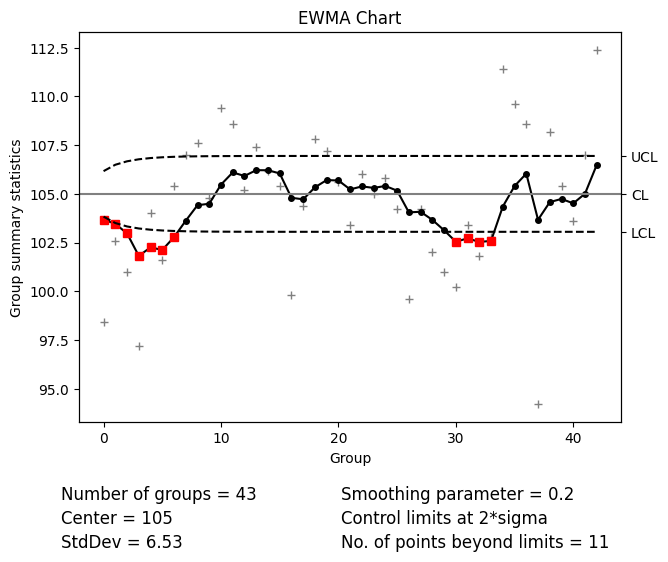

In [32]:
speed = mistat.load_data('FILMSP')

groups = [y for x in range(1, 44) for y in [x]*5]
grouped = mistat.qcc_groups(speed[:215], groups=groups)

ewma = mistat.EWMA(grouped, center=105, std_dev=6.53, nsigmas=2)
ax = ewma.plot()
plt.show()

## Chapter Highlights

## Exercises